In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
path='E:/ISIC DATA'
trainingpath='E:/Training'

In [2]:
filelist=os.listdir(path)
meta=[file for file in filelist if not file.endswith(".jpeg") and not file.endswith(".png") and file.startswith("ISIC")]
pics=[file for file in filelist if (file.endswith(".jpeg") or file.endswith(".png")) and file.startswith("ISIC")]

In [3]:
len(meta)

23906

In [4]:
len(pics)

23906

In [5]:
meta[1]

'ISIC_0000001'

In [6]:
#for file in meta:
filename=path+'/'+meta[0]
f=open(filename,"rt")
data=json.load(f)
df=json_normalize(data)
df

,_id,_modelType,created,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,dataset.license,dataset.name,...,meta.unstructured.diagnosis,meta.unstructured.id1,meta.unstructured.localization,meta.unstructured.site,name,notes.reviewed.accepted,notes.reviewed.time,notes.reviewed.userId,notes.tags,updated
0,5436e3abbae478396759f0cf,image,2014-10-09T19:36:11.989000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,dysplastic nevus,1,Abdomen,bar,ISIC_0000000,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Training, ISBI 2017: Training, Cha...",2015-02-23T02:48:17.495000+00:00


In [7]:
import json
from pandas.io.json import json_normalize
import pandas as pd
for file in meta:
    filename=path+'/'+file
    f=open(filename,"rt")
    data=json.load(f)
    if "df" not in locals():
        df=json_normalize(data)
    else:
        df1=json_normalize(data)
        df=df.append(df1,ignore_index=True)

C:\Users\shshi\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
df.head()

,_id,_modelType,created,creator._id,creator.name,dataset._accessLevel,dataset._id,dataset.description,dataset.license,dataset.name,...,meta.unstructured.race,meta.unstructured.site,meta.unstructured.ulcer,meta.unstructured.vertical,name,notes.reviewed.accepted,notes.reviewed.time,notes.reviewed.userId,notes.tags,updated
0,5436e3abbae478396759f0cf,image,2014-10-09T19:36:11.989000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,NaN,bar,NaN,NaN,ISIC_0000000,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Training, ISBI 2017: Training, Cha...",2015-02-23T02:48:17.495000+00:00
1,5436e3acbae478396759f0d1,image,2014-10-09T19:36:12.070000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,NaN,bar,NaN,NaN,ISIC_0000001,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Training, ISBI 2017: Training, Cha...",2015-02-23T02:48:27.455000+00:00
2,5436e3acbae478396759f0d3,image,2014-10-09T19:36:12.152000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,NaN,bar,NaN,NaN,ISIC_0000002,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Training, ISBI 2017: Training]",2015-02-23T02:48:37.249000+00:00
3,5436e3acbae478396759f0d5,image,2014-10-09T19:36:12.233000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,NaN,bar,NaN,NaN,ISIC_0000003,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Test, ISBI 2017: Training, Challen...",2015-02-23T02:48:46.021000+00:00
4,5436e3acbae478396759f0d7,image,2014-10-09T19:36:12.315000+00:00,5450e996bae47865794e4d0d,User 6VSN,0,5a2ecc5e1165975c945942a2,Moles and melanomas.\nBiopsy-confirmed melanoc...,CC-0,UDA-1,...,NaN,bar,NaN,NaN,ISIC_0000004,True,2014-11-10T02:39:56.492000+00:00,5436c6e7bae4780a676c8f93,"[ISBI 2016: Training, ISBI 2017: Training, Cha...",2015-02-23T02:48:57.303000+00:00


In [9]:
df.columns

Index(['_id', '_modelType', 'created', 'creator._id', 'creator.name',
       'dataset._accessLevel', 'dataset._id', 'dataset.description',
       'dataset.license', 'dataset.name', 'dataset.updated',
       'meta.acquisition.dermoscopic_type', 'meta.acquisition.image_type',
       'meta.acquisition.pixelsX', 'meta.acquisition.pixelsY',
       'meta.clinical.age_approx', 'meta.clinical.anatom_site_general',
       'meta.clinical.benign_malignant',
       'meta.clinical.clin_size_long_diam_mm', 'meta.clinical.diagnosis',
       'meta.clinical.diagnosis_confirm_type', 'meta.clinical.family_hx_mm',
       'meta.clinical.mel_class', 'meta.clinical.mel_thick_mm',
       'meta.clinical.melanocytic', 'meta.clinical.nevus_type',
       'meta.clinical.personal_hx_mm', 'meta.clinical.sex',
       'meta.unstructured.Breslow', 'meta.unstructured.Clark',
       'meta.unstructured.Location', 'meta.unstructured.anatom_site_general',
       'meta.unstructured.anatomic', 'meta.unstructured.biopsy done',

In [10]:
import pickle
name="isic_data"
pickle.dump(df,open(name,"wb"))

In [5]:
import pickle
name="isic_data"
df=pickle.load(open(name,"rb"))

In [6]:
df['meta.clinical.benign_malignant'].unique()

array(['benign', 'malignant', 'indeterminate', None,
       'indeterminate/benign', 'indeterminate/malignant', nan],
      dtype=object)

In [8]:
benign=df[df['meta.clinical.benign_malignant']=='benign']
malignant=df[df['meta.clinical.benign_malignant']=='malignant']

In [9]:
malignant['meta.clinical.age_approx'].value_counts(dropna=True)

70    311
65    281
55    229
85    219
60    203
75    187
80    186
50    171
45    126
40     93
35     68
30     61
25     37
20      7
15      7
10      1
5       1
Name: meta.clinical.age_approx, dtype: int64

In [19]:
malig_age=np.sort(malignant['meta.clinical.age_approx'].dropna())

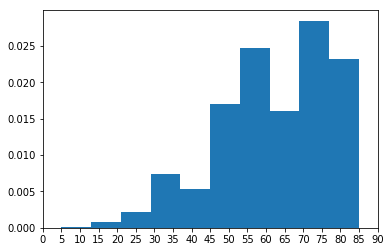

In [20]:
plt.hist(malig_age.tolist(),bins=10,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.show()

In [21]:
malig_mean=np.mean(malig_age)
malig_std=np.std(malig_age)
print(malig_mean,malig_std)

62.00411334552103 15.77792297108487


In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

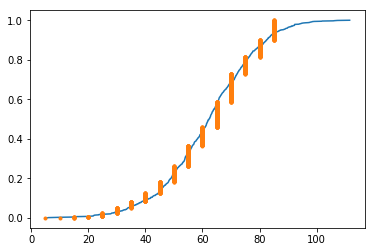

In [24]:
malig_samples=np.random.normal(malig_mean,malig_std,size=1000)

x_norm,y_norm=ecdf(malig_samples)
x,y=ecdf(malig_age)

plt.plot(x_norm,y_norm)
plt.plot(x,y, marker='.',linestyle='none')

In [15]:
benign['meta.clinical.age_approx'].value_counts(dropna=True)

15    7855
10    1596
45    1408
50    1214
40    1107
55     916
35     896
60     761
30     655
65     609
70     452
25     417
75     393
20     249
85     237
80     192
5       86
0       33
Name: meta.clinical.age_approx, dtype: int64

In [26]:
ben_age=np.sort(benign['meta.clinical.age_approx'].dropna())

In [29]:
ben_mean=np.mean(ben_age)
ben_std=np.std(ben_age)
print(ben_mean,ben_std)

31.51682742713357 20.651396162782493


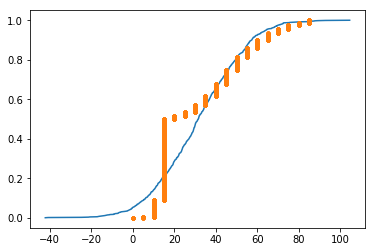

In [28]:
ben_samples=np.random.normal(ben_mean,ben_std,size=1000)

x_norm,y_norm=ecdf(ben_samples)
x,y=ecdf(ben_age)

plt.plot(x_norm,y_norm)
plt.plot(x,y, marker='.',linestyle='none')

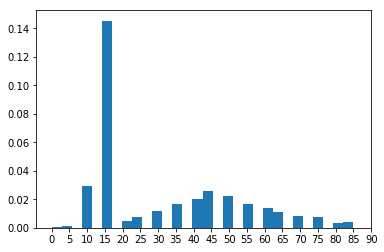

In [18]:
plt.hist(ben_age,bins=30,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.show()

49.126867241742055 15.256254897497563


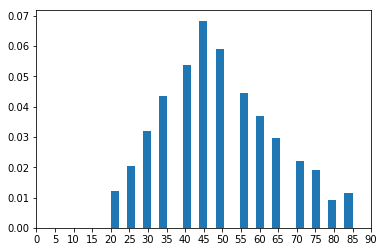

In [34]:
ben_age_noteen=[i for i in ben_age if i>19]
ben_mean=np.mean(ben_age_noteen)
ben_std=np.std(ben_age_noteen)
print(ben_mean,ben_std)
plt.hist(ben_age_noteen,bins=30,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.show()

62.20513997246443 15.495181302998938


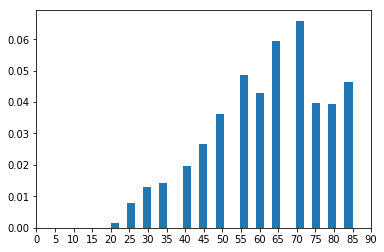

In [35]:
mal_age_noteen=[i for i in malig_age if i>19]
mal_mean=np.mean(mal_age_noteen)
mal_std=np.std(mal_age_noteen)
print(mal_mean,mal_std)
plt.hist(mal_age_noteen,bins=30,density=True)
plt.xticks(np.arange(0, 95, 5))
plt.show()

while malignant data is relatively normal, benign data is not at all normal


The benign data has much lower average age than malignant, probably due to overwhelmingly more number of teens.

Even if we only count patients from 20 years old or older, however, the mean of the patients without melanoma is much younger than those who were diagnosed with melanoma

In [92]:
mole_positions=df['meta.clinical.anatom_site_general'].dropna()
num_data=mole_positions.value_counts()
print(num_data)

posterior torso    3209
lower extremity    3145
anterior torso     2127
upper extremity    1920
head/neck          1690
lateral torso        75
palms/soles          30
Name: meta.clinical.anatom_site_general, dtype: int64


In [93]:
import seaborn as sns

Text(0.5,0,'positions of moles')

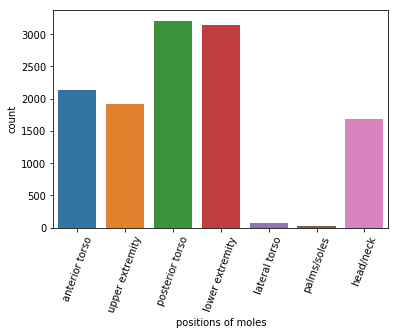

In [96]:
ax=sns.countplot(x=mole_positions.index,data=data1)
ax.set_xticklabels(mole_positions.unique(),rotation=70)
ax.set_xlabel("positions of moles")

In [110]:
import pandas as pd

In [127]:
benign_positions=benign['meta.clinical.anatom_site_general'].dropna()
benign_counts=benign_positions.value_counts(normalize=True).to_frame()

In [126]:
malignant_positions=malignant['meta.clinical.anatom_site_general'].dropna()
malignant_counts=malignant_positions.value_counts(normalize=True).to_frame()

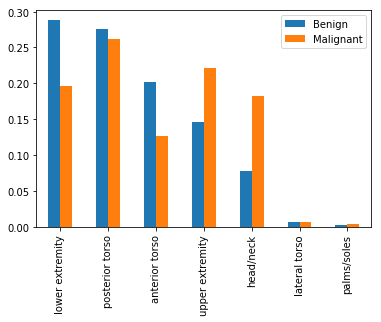

In [136]:
ax=pd.concat({'Malignant':malignant_counts,'Benign':benign_counts}, axis=1,sort=False).plot.bar()
ax.legend(['Benign','Malignant'])

The mole on the head or neck are more likely to be malignant than not. This may be due to melanoma developing from exposure to UV light as head and neck is most likely to be exposed to direct sunlight.
This may also explain why more moles on the upper part of the body is more likely to have malignant mole than the lower extremity.

In [119]:
print(benign_counts)

lower extremity    2321
posterior torso    2222
anterior torso     1625
upper extremity    1177
head/neck           630
lateral torso        59
palms/soles          22
Name: meta.clinical.anatom_site_general, dtype: int64


C:\Users\shshi\Anaconda3\lib\site-packages\pandas\core\series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0.5,0,'positions of malignant moles')

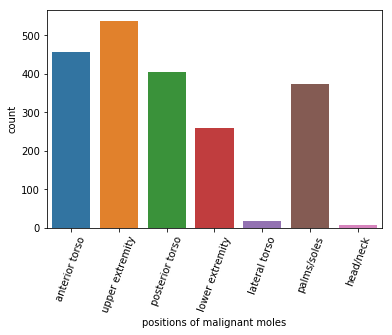

In [102]:
ax=sns.countplot(x=mole_positions.index,data=mela_positions)
ax.set_xticklabels(mole_positions.unique(),rotation=70)
ax.set_xlabel("positions of malignant moles")

In [ ]:
def picktraining(category):
    """Get list of training set of the disease of my choice"""
    random.seed(42)
    train=random.sample(disease[category],round(len(disease[category])*0.3))
    return train

In [76]:
def display(a, title1='original'):
    plt.imshow(a),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.show()

def display_two(a,b, title1='original',title2='edited'):
    plt.subplot(121),plt.imshow(a),plt.title(title1)
    plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(b),plt.title(title2)
    plt.xticks([]),plt.yticks([])
    plt.show()

TypeError: Image data cannot be converted to float

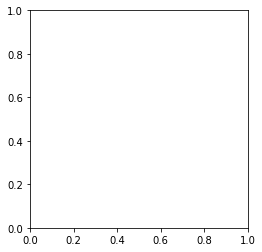

In [79]:
display(path+'/'+pics[0])